In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

Total images found: 18000
['/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom', '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom', '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom', '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom', '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom', '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom']


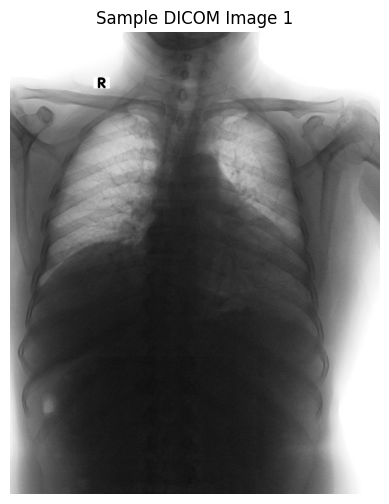

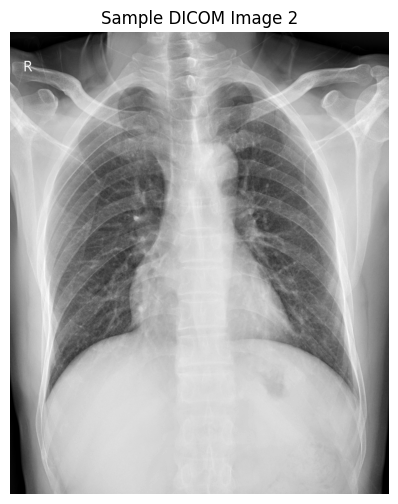

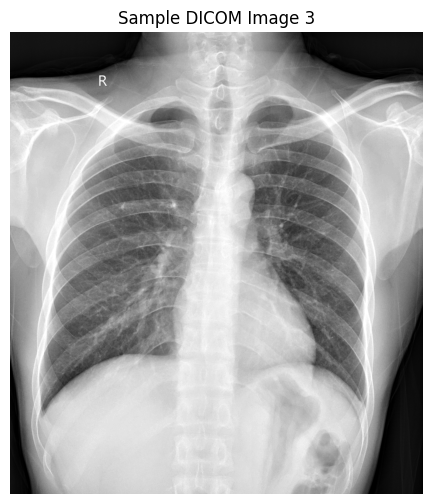

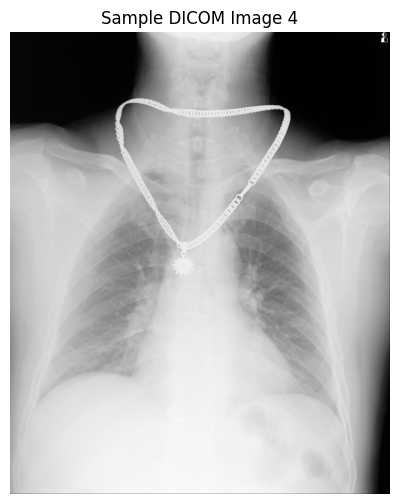

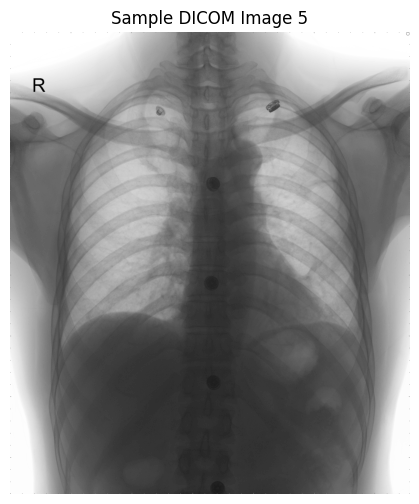

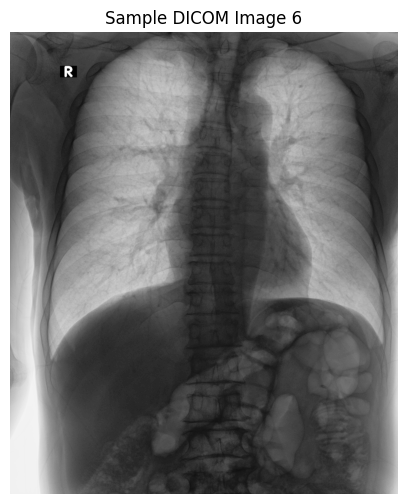

In [2]:
import os
import matplotlib.pyplot as plt
import pydicom

# Collect all DICOM image paths
image_paths = []
for dirname, _, filenames in os.walk('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection'):
    for filename in filenames:
        if filename.lower().endswith('.dicom'):
            image_paths.append(os.path.join(dirname, filename))

print(f"Total images found: {len(image_paths)}")
print(image_paths[:6])

# Read and visualize 1 or 2 DICOM images
for i in range(6):
    dicom_file = pydicom.dcmread(image_paths[i])  # Read DICOM
    img_array = dicom_file.pixel_array            # Get pixel data

    plt.figure(figsize=(6,6))
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Sample DICOM Image {i+1}")
    plt.axis('off')
    plt.show()


In [2]:
# ==============================================================
# CliniScan: DICOM → PNG + CSV Parsing Script (FIRST 2000 IMAGES)
# ==============================================================

import os
import cv2
import pydicom
import pandas as pd
import numpy as np
from tqdm import tqdm

# ------------------------------
# 1️⃣ Paths (update if needed)
# ------------------------------
DICOM_DIR = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train"
ANNOTATION_CSV = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv"
OUTPUT_DIR = "/kaggle/working/vindr_png"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ------------------------------
# 2️⃣ Load annotation CSV
# ------------------------------
df = pd.read_csv(ANNOTATION_CSV)
print("Total annotations:", len(df))
print(df.head())

# ------------------------------
# 3️⃣ Convert DICOM → PNG  (2000 images only)
# ------------------------------
def convert_dicom_to_png(dicom_path, output_path, size=(512, 512)):
    """Read DICOM, resize, normalize, and save as PNG"""
    dicom = pydicom.dcmread(dicom_path)
    image = dicom.pixel_array.astype(np.float32)

    # Normalize pixel intensity (0–255)
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    image = np.uint8(image)

    # Resize to fixed size
    image = cv2.resize(image, size)

    # Save as PNG
    cv2.imwrite(output_path, image)


# Load only the first **2000** DICOM files
dicom_files = [f for f in os.listdir(DICOM_DIR) if f.endswith(".dicom")]
dicom_files = dicom_files[:2000]   # 🔥 LIMIT to 2000 images

print(f"Found {len(dicom_files)} DICOM images (limited to 2000).")

# Convert
for file in tqdm(dicom_files):
    dicom_path = os.path.join(DICOM_DIR, file)
    output_path = os.path.join(OUTPUT_DIR, file.replace(".dicom", ".png"))
    convert_dicom_to_png(dicom_path, output_path)

print("✅ Conversion completed for first 2000 images.")
print("Images saved to:", OUTPUT_DIR)



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Total annotations: 67914
                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN  
Found 2000 DICOM images (limited to 2000).


100%|██████████| 2000/2000 [35:03<00:00,  1.05s/it] 

✅ Conversion completed for first 2000 images.
Images saved to: /kaggle/working/vindr_png


In [4]:
# =============================================================
# CliniScan: PNG Preprocessing Pipeline (First 2000 Images)
# =============================================================

import os
import cv2
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

# --------------------------------------------------------------
# 1️⃣ Paths
# --------------------------------------------------------------
PNG_DIR = "/kaggle/working/vindr_png"
OUTPUT_PREPROCESSED = "/kaggle/working/preprocessed_png"
os.makedirs(OUTPUT_PREPROCESSED, exist_ok=True)

# --------------------------------------------------------------
# 2️⃣ Preprocessing Parameters
# --------------------------------------------------------------
TARGET_SIZE = (512, 512)  # Resize
DOWNSCALE = 1.0           # Use 0.5 for 50% smaller images

# PyTorch transform
transform = transforms.Compose([
    transforms.Resize(TARGET_SIZE),
    transforms.ToTensor(),  # (H,W,C) → (C,H,W) & normalize to 0-1
    transforms.Normalize(mean=[0.5], std=[0.5])  # grayscale: 1 channel
])

# --------------------------------------------------------------
# 3️⃣ Preprocess a PNG image
# --------------------------------------------------------------
def preprocess_png(img_path, output_path):
    img = Image.open(img_path).convert("L")   # Convert to grayscale

    # Optional downscale
    if DOWNSCALE < 1.0:
        new_w = int(img.size[0] * DOWNSCALE)
        new_h = int(img.size[1] * DOWNSCALE)
        img = img.resize((new_w, new_h))

    # Apply PyTorch transforms
    tensor_img = transform(img)  # shape: (1, 512, 512)

    # Save preprocessed PNG for inspection
    img_np = tensor_img.squeeze().numpy()
    img_np = ((img_np + 1) * 127.5).astype(np.uint8)  # convert back to 0–255
    cv2.imwrite(output_path, img_np)

    return tensor_img

# --------------------------------------------------------------
# 4️⃣ Process first 2000 PNG images
# --------------------------------------------------------------
png_files = [f for f in os.listdir(PNG_DIR) if f.endswith(".png")]
png_files = png_files[:2000]   # 🔥 limit to first 2000

all_tensors = []

print("Processing", len(png_files), "images...")

for f in tqdm(png_files):
    path = os.path.join(PNG_DIR, f)
    save_path = os.path.join(OUTPUT_PREPROCESSED, f)
    tensor_img = preprocess_png(path, save_path)
    all_tensors.append(tensor_img)

print("✅ Preprocessing completed!")
print("Example tensor shape:", all_tensors[0].shape)
print("Saved preprocessed PNGs to:", OUTPUT_PREPROCESSED)


Processing 2000 images...


100%|██████████| 2000/2000 [00:22<00:00, 90.75it/s]

✅ Preprocessing completed!
Example tensor shape: torch.Size([1, 512, 512])
Saved preprocessed PNGs to: /kaggle/working/preprocessed_png
